# Modeling and Evaluation Notebook

## Objectives

*   Answer business requirement 2: 
    * The client is interested to predict if a cherry leaf is healthy or contains powdery mildew.

## Inputs

* model_input/test
* model_input/train
* model_input/val
* image shape embeddings

## Outputs
* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file


In [4]:
!{sys.executable} -m pip install matplotlib

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Set Working Directory

In [6]:
cwd= os.getcwd()

In [7]:
os.chdir('/workspace/Mildew-detection-project')

In [8]:
work_dir = os.getcwd()
work_dir

'/workspace/Mildew-detection-project'

## Set input directories

Set train, validation and test paths

In [9]:
my_data_dir = '/workspace/Mildew-detection-project/model_input'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/val'
test_path = my_data_dir + '/test'

## Set output directory

In [10]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [11]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['healthy', 'powdery_mildew']


## Set image shape

In [12]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

# Number of images in train, test and validation data

In [13]:
for filename in os.listdir('/workspace/Mildew-detection-project/model_input'): #get directory name, store name in a list and print the name
    files=[]                                                               
    files.append(filename)
    print(files)
    for file in files: #print the number of elements in the directory that was just printed
        pass
        element_path = '/healthy'
        DIR = my_data_dir + '/' + file + element_path
        No_of_files = len(os.listdir(DIR))
        print(No_of_files)


['test']
422
['train']
1472
['val']
210


# Image data augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-09-29 17:51:03.757235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 17:51:03.884681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-29 17:51:03.884707: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-29 17:51:03.908050: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 17:51:04.685264: W tensorflow/stream_executor/platform/de

* ### Intiatize ImageDataGenerator

In [15]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

* ### Augment training image dataset

In [16]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment test image dataset

In [17]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment validation image dataset

In [18]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 100, 100, 3)


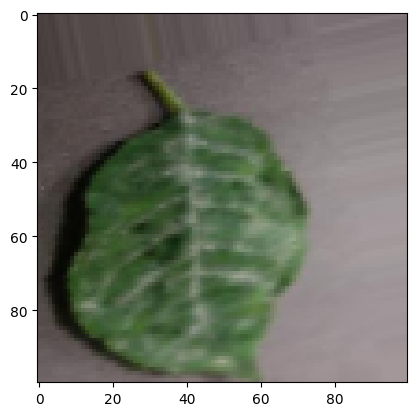

(20, 100, 100, 3)


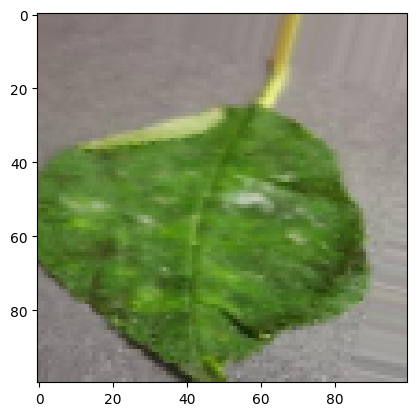

(20, 100, 100, 3)


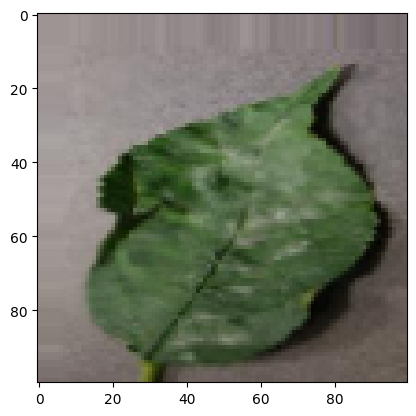

In [19]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation and test images

(20, 100, 100, 3)


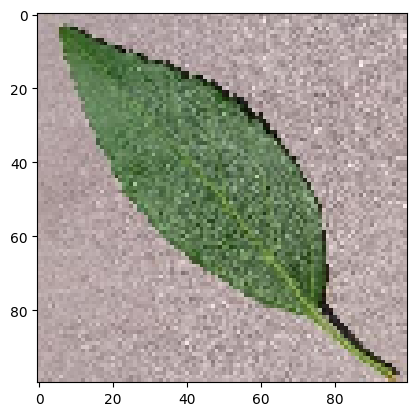

(20, 100, 100, 3)


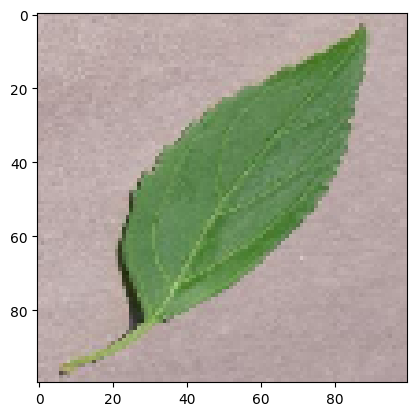

(20, 100, 100, 3)


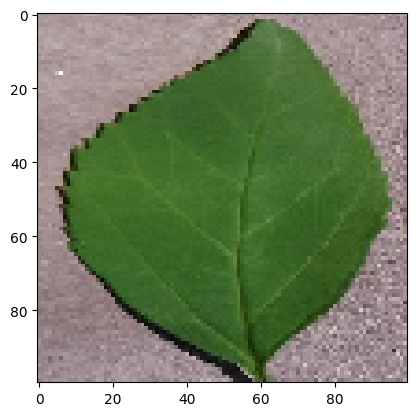

In [20]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [21]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

# Model creation


---

## Ml model

* ### Import model packages

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

* ### Model 

In [23]:
image_shape = (100, 100, 3)
image_shape

(100, 100, 3)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

def create_tf_model():
    model = Sequential()

    model.add(Conv2D(input_shape = image_shape, filters=16, kernel_size=(4,4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(input_shape = image_shape,filters=32, kernel_size=(4,4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])

    return model

* ### Model Summary 

In [25]:
create_tf_model().summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1

2022-09-29 17:51:08.239614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-29 17:51:08.239667: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-29 17:51:08.239709: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kylo74-mildewdetectionp-9gyrw6lmk5h): /proc/driver/nvidia/version does not exist
2022-09-29 17:51:08.239999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* ### Early Stopping 

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Fit model for model training

In [27]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
147/147 [==============================] - 11s 69ms/step - loss: 0.3432 - Accuracy: 0.8523 - val_loss: 0.0989 - val_Accuracy: 0.9738
Epoch 2/25
147/147 [==============================] - 10s 68ms/step - loss: 0.0902 - Accuracy: 0.9733 - val_loss: 0.0480 - val_Accuracy: 0.9857
Epoch 3/25
147/147 [==============================] - 10s 66ms/step - loss: 0.0531 - Accuracy: 0.9836 - val_loss: 0.0166 - val_Accuracy: 0.9929
Epoch 4/25
147/147 [==============================] - 10s 68ms/step - loss: 0.0333 - Accuracy: 0.9897 - val_loss: 0.0331 - val_Accuracy: 0.9905
Epoch 5/25
147/147 [==============================] - 10s 66ms/step - loss: 0.0492 - Accuracy: 0.9856 - val_loss: 0.0558 - val_Accuracy: 0.9857
Epoch 6/25
147/147 [==============================] - 10s 70ms/step - loss: 0.0351 - Accuracy: 0.9901 - val_loss: 0.0137 - val_Accuracy: 0.9952
Epoch 7/25
147/147 [==============================] - 10s 68ms/step - loss: 0.0341 - Accuracy: 0.9887 - val_loss: 0.0520 - val_Accuracy:

## Save model

In [34]:
model.save('outputs/v1/mildew_detector_model.h5')

## Learning curve

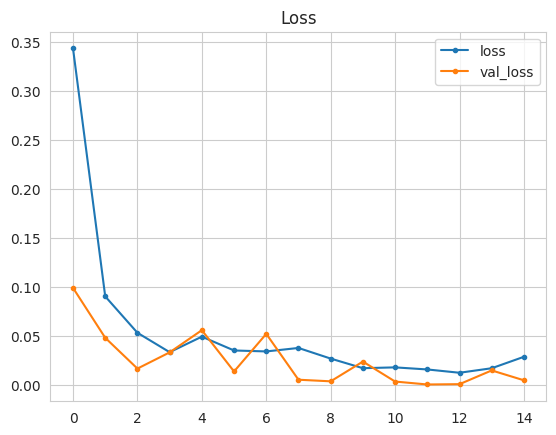

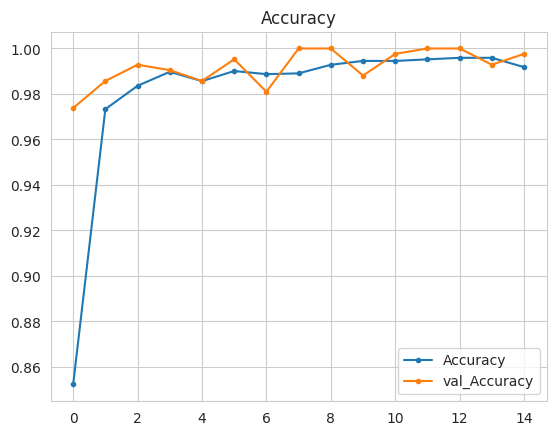

In [39]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['Accuracy','val_Accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()